In [1]:
import pandas as pd
import numpy as np
from scipy.sparse import hstack
from wordcloud import WordCloud, STOPWORDS
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import TreebankWordTokenizer, sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.draw.dispersion import dispersion_plot
from sklearn.model_selection import cross_val_score

import string
from os import cpu_count
stop_words = set(stopwords.words('english'))
from matplotlib import pyplot as plt
from matplotlib import gridspec
import seaborn as sns
sns.set_style("dark")
%matplotlib inline

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head(9)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0


In [4]:
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [5]:
train.tail()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


In [6]:
train['comment_text'][0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [7]:
all_text = train['comment_text'].str.cat(sep=' ')

In [8]:
len(all_text)

63042228

In [9]:
type(all_text)

str

In [10]:
%%time
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', width=1000, max_words=10, height=1000).generate(all_text)

Wall time: 33.2 s


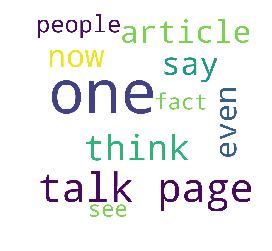

In [11]:
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [12]:
def get_complexity(text):
    '''
    return:
    number of unique words,
    avg char in word
    avg words in sentence
    proportion unique words to all words
    '''
    num_chars = len(text)
    words = word_tokenize(text)
    num_words = len(words)
    num_sentences = len(sent_tokenize(text))
    vocabulary = {x.lower() for x in words}
    return len(vocabulary), int(num_chars/num_words), int(num_words/num_sentences), len(vocabulary)/num_words

In [13]:
%%time
get_complexity(all_text)

Wall time: 1min 29s


(261211, 4, 20, 0.020398736331196553)

In [14]:
wordcloud.words_

{'one': 1.0,
 'talk page': 0.9918590599758316,
 'think': 0.7426063728296126,
 'say': 0.606500031800547,
 'now': 0.5996947147490936,
 'article': 0.5867836926795141,
 'even': 0.5617248616676207,
 'people': 0.5348852000254405,
 'see': 0.46791324810786744,
 'fact': 0.4625071551230681}

In [15]:
delete_words = []

In [16]:
def remove_words(text: str, delete_words = delete_words):
    words = text.split()
    for word in delete_words:
        text = text.replace(word, ' ')
    return text
        

In [17]:
def remove_short_words(text, min_length = 3):
    words = text.split()
    for word in words:
        if len(word)<min_length:
            delete_words.append(word)
            text = text.replace(' '+word+' ', ' ', 1)
    return text

In [18]:
'fffuck'[0]

'f'

In [19]:
delete_words

[]

In [20]:
v = 'fffuck'.find('fuck')

In [21]:
'fffuck'[v:len('fuck')+v]

'fuck'

In [22]:
def plot_words(text):
    fig, axes = plt.subplots(3, 2, figsize=(12,12))
    
    for i in range(0,6):
        all_text[i+100:5000]
#         ax = axes[i%2]
        ax = axes[i//2,i%2] # if row >=2
#         ax.set_title("Hello")
        wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', width=1000, max_words=10, height=1000).generate(text)
        ax.imshow(wordcloud)
        ax.axis('off')
    plt.show()

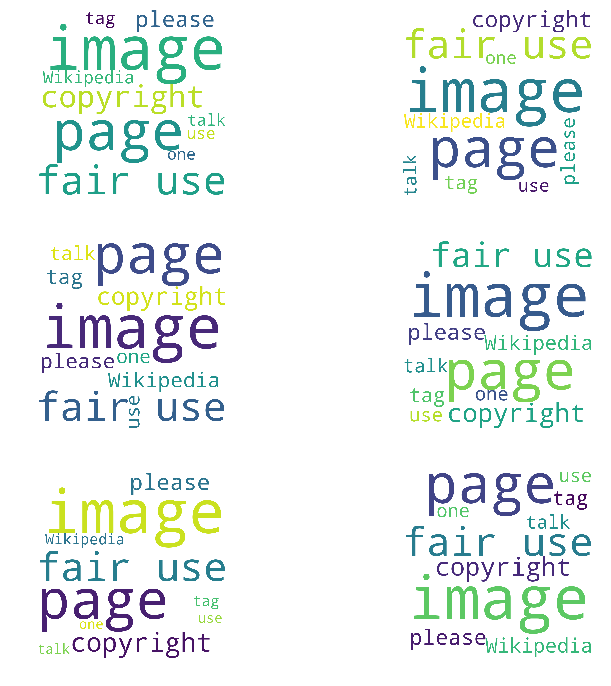

In [23]:
plot_words(all_text[0:5000])

In [24]:
from nltk.tokenize.casual import casual_tokenize

In [25]:
casual_tokenize("hghffhvhg mhjhg (((:")

['hghffhvhg', 'mhjhg', '(', '(', '(:']

In [26]:
all_text[0:5000].split()

['Explanation',
 'Why',
 'the',
 'edits',
 'made',
 'under',
 'my',
 'username',
 'Hardcore',
 'Metallica',
 'Fan',
 'were',
 'reverted?',
 'They',
 "weren't",
 'vandalisms,',
 'just',
 'closure',
 'on',
 'some',
 'GAs',
 'after',
 'I',
 'voted',
 'at',
 'New',
 'York',
 'Dolls',
 'FAC.',
 'And',
 'please',
 "don't",
 'remove',
 'the',
 'template',
 'from',
 'the',
 'talk',
 'page',
 'since',
 "I'm",
 'retired',
 'now.89.205.38.27',
 "D'aww!",
 'He',
 'matches',
 'this',
 'background',
 'colour',
 "I'm",
 'seemingly',
 'stuck',
 'with.',
 'Thanks.',
 '(talk)',
 '21:51,',
 'January',
 '11,',
 '2016',
 '(UTC)',
 'Hey',
 'man,',
 "I'm",
 'really',
 'not',
 'trying',
 'to',
 'edit',
 'war.',
 "It's",
 'just',
 'that',
 'this',
 'guy',
 'is',
 'constantly',
 'removing',
 'relevant',
 'information',
 'and',
 'talking',
 'to',
 'me',
 'through',
 'edits',
 'instead',
 'of',
 'my',
 'talk',
 'page.',
 'He',
 'seems',
 'to',
 'care',
 'more',
 'about',
 'the',
 'formatting',
 'than',
 'the',
 '

In [27]:
words = ['Fuck', 'hello', 'fuck', 'and']

In [28]:
import nltk
nltk.download('gutenberg')
nltk.download('genesis')
nltk.download('inaugural')
nltk.download('nps_chat')
nltk.download('webtext')
nltk.download('treebank')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\lyaba\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package genesis to
[nltk_data]     C:\Users\lyaba\AppData\Roaming\nltk_data...
[nltk_data]   Package genesis is already up-to-date!
[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\lyaba\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package nps_chat to
[nltk_data]     C:\Users\lyaba\AppData\Roaming\nltk_data...
[nltk_data]   Package nps_chat is already up-to-date!
[nltk_data] Downloading package webtext to
[nltk_data]     C:\Users\lyaba\AppData\Roaming\nltk_data...
[nltk_data]   Package webtext is already up-to-date!
[nltk_data] Downloading package treebank to
[nltk_data]     C:\Users\lyaba\AppData\Roaming\nltk_data...
[nltk_data]   Package treebank is already up-to-date!


True

In [ ]:
# nltk.download()

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


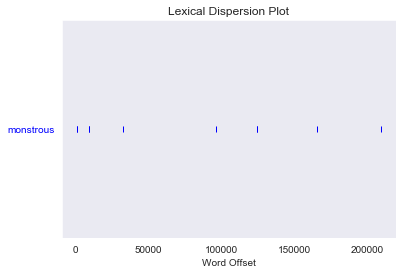

In [28]:
from nltk.book import text1
from nltk.draw.dispersion import dispersion_plot

dispersion_plot(text1, ['monstrous'])


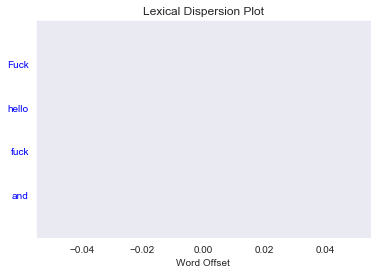

In [30]:
dispersion_plot(all_text, words)

In [6]:
# train[train[toxic_type].sum(axis=1) == 0]

In [6]:
toxic_type = train.columns[2:]
rowsum = train[toxic_type].sum(axis=1)
train['clean'] = rowsum.apply(lambda x: 0 if x>0 else 1)
train['clean'].sum()

143346

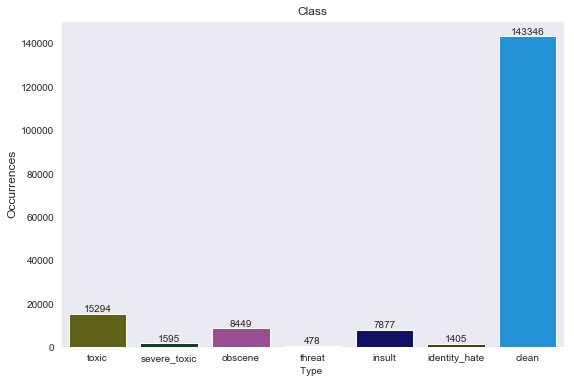

In [7]:
colors_list = ["brownish green", "pine green", "ugly purple",
               "blood", "deep blue", "brown", "azure"]

palette= sns.xkcd_palette(colors_list)

x=train.iloc[:,2:].sum()

plt.figure(figsize=(9,6))
ax= sns.barplot(x.index, x.values,palette=palette)
plt.title("Class")
plt.ylabel('Occurrences', fontsize=12)
plt.xlabel('Type ')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 10, label, 
            ha='center', va='bottom')

plt.show()

In [9]:
word_tokenizer = TreebankWordTokenizer().tokenize
sent_tokenizer = sent_tokenize

In [2]:
def basic_preprocessing(comment):
    comment = comment.strip()
    comment = re.sub(' +',' ', comment)
    comment = re.sub(r'http\S+', '', comment)
    comment = re.sub(r'\n','',comment)
    return comment

In [13]:
train['preprocessed_text'] = train['comment_text'].apply(lambda x: basic_preprocessing(x))
test['preprocessed_text'] = test['comment_text'].apply(lambda x: basic_preprocessing(x))


In [15]:
%%time
train['sent_tokens'] = train['preprocessed_text'].apply(lambda x: sent_tokenizer(x))
test['sent_tokens'] = test['preprocessed_text'].apply(lambda x: sent_tokenizer(x))

Wall time: 37.3 s


In [17]:
train['sent_tokens'][1]

["D'aww!",
 "He matches this background colour I'm seemingly stuck with.",
 'Thanks.',
 '(talk) 21:51, January 11, 2016 (UTC)']

# Tokenization of words


In [18]:
%%time
tokenize = word_tokenizer
train['tokens'] = train['sent_tokens'].apply(lambda x: [tokenize(token) for token in x])
test['tokens'] = test['sent_tokens'].apply(lambda x: [tokenize(token) for token in x])

Wall time: 1min 42s


In [19]:
train['tokens'][1]

[["D'aww", '!'],
 ['He',
  'matches',
  'this',
  'background',
  'colour',
  'I',
  "'m",
  'seemingly',
  'stuck',
  'with',
  '.'],
 ['Thanks', '.'],
 ['(',
  'talk',
  ')',
  '21:51',
  ',',
  'January',
  '11',
  ',',
  '2016',
  '(',
  'UTC',
  ')']]

In [22]:
train['tokens'].head()

0    [[ExplanationWhy, the, edits, made, under, my,...
1    [[D'aww, !], [He, matches, this, background, c...
2    [[Hey, man, ,, I, 'm, really, not, trying, to,...
3    [[``, MoreI, ca, n't, make, any, real, suggest...
4    [[You, ,, sir, ,, are, my, hero, .], [Any, cha...
Name: tokens, dtype: object

In [25]:
train['tokens'].tail()

159566    [[``, :, :, :, :, :, And, for, the, second, ti...
159567    [[You, should, be, ashamed, of, yourself, That...
159568    [[Spitzer, Umm, ,, theres, no, actual, article...
159569    [[And, it, looks, like, it, was, actually, you...
159570    [[``, And, ...], [I, really, do, n't, think, y...
Name: tokens, dtype: object

In [24]:
# def d(docs):
#     return [token.replace(",", "") for doc in docs for token in doc]

In [27]:
train['tokens'] = train['tokens'].apply(lambda x: [token for doc in x for token in doc if token.isalpha()])
test['tokens'] = test['tokens'].apply(lambda x: [token for doc in x for token in doc if token.isalpha()])

In [28]:
train['tokens'] = train['tokens'].apply(lambda x: [token.lower() for token in x])
test['tokens'] = test['tokens'].apply(lambda x: [token.lower() for token in x])

In [29]:
train['tokens'] = train['tokens'].apply(lambda x: [token for token in x if not token in stop_words])
test['tokens'] = test['tokens'].apply(lambda x: [token for token in x if not token in stop_words] )

In [31]:
test[test['tokens'].isnull()]

,id,comment_text,preprocessed_text,sent_tokens,tokens


In [32]:
train['tokens'].head()

0    [explanationwhy, edits, made, username, hardco...
1    [matches, background, colour, seemingly, stuck...
2    [hey, man, really, trying, edit, war, guy, con...
3    [morei, ca, make, real, suggestions, improveme...
4                  [sir, hero, chance, remember, page]
Name: tokens, dtype: object

In [34]:
test['tokens'].head()

0    [yo, bitch, ja, rule, succesful, ever, whats, ...
1                              [rfc, title, fine, imo]
2                     [sources, zawe, ashton, lapland]
3    [look, back, source, information, updated, cor...
4                        [anonymously, edit, articles]
Name: tokens, dtype: object

In [499]:
# train['tokens'] = train['tokens'].apply(lambda x:[ token.replace(",", "") for doc in x for token in doc])
# train['tokens'] = train['tokens'].apply(lambda x:[ token.replace(":", "") for token in x])
# train['tokens'].head()

In [35]:
train['tokens'].tail()

159566    [second, time, asking, view, completely, contr...
159567          [ashamed, horrible, thing, put, talk, page]
159568    [spitzer, umm, theres, actual, article, prosti...
159569    [looks, like, actually, put, speedy, first, ve...
159570    [really, think, understand, came, idea, bad, r...
Name: tokens, dtype: object

In [36]:
test['tokens'].tail()

153159                     [totally, agree, stuff, nothing]
153160    [throw, field, home, plate, get, faster, throw...
153161    [okinotorishima, categories, see, changes, agr...
153162    [one, founding, nations, eu, germany, law, ret...
153163    [stop, already, bullshit, welcome, fool, think...
Name: tokens, dtype: object

# Stemming and Lemmatization

In [37]:
stemmer = PorterStemmer()

In [38]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean,preprocessed_text,sent_tokens,tokens
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,1,ExplanationWhy the edits made under my usernam...,[ExplanationWhy the edits made under my userna...,"[explanationwhy, edits, made, username, hardco..."
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,1,D'aww! He matches this background colour I'm s...,"[D'aww!, He matches this background colour I'm...","[matches, background, colour, seemingly, stuck..."
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,1,"Hey man, I'm really not trying to edit war. It...","[Hey man, I'm really not trying to edit war., ...","[hey, man, really, trying, edit, war, guy, con..."
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,1,"""MoreI can't make any real suggestions on impr...","[""MoreI can't make any real suggestions on imp...","[morei, ca, make, real, suggestions, improveme..."
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,1,"You, sir, are my hero. Any chance you remember...","[You, sir, are my hero., Any chance you rememb...","[sir, hero, chance, remember, page]"


In [39]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("english",ignore_stopwords=True)

In [40]:
%%time
train['snowball_stemmer'] = train['tokens'].apply(lambda x: " ".join(stemmer.stem(token) for token in x))
test['snowball_stemmer'] = test['tokens'].apply(lambda x: " ".join(stemmer.stem(token) for token in x))

Wall time: 1min 48s


In [41]:
from nltk.stem import WordNetLemmatizer

In [42]:
lemmatize = WordNetLemmatizer().lemmatize

In [43]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lyaba\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [44]:
%%time
train['lemmatize'] = train['tokens'].apply(lambda x: " ".join(lemmatize(word=token) for token in x))
test['lemmatize'] = test['tokens'].apply(lambda x: " ".join(lemmatize(word=token) for token in x))

Wall time: 31.7 s


# Vectorizing

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression

In [90]:
word_vectorizer = TfidfVectorizer(
    max_df=0.85,
    min_df=2,
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 4),
    max_features=30000)


In [91]:
char_vectorizer = TfidfVectorizer(
    max_df=0.85,
    min_df=2,
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(2, 5),
    max_features=30000)

In [92]:
%%time
word_vectorizer.fit(train['lemmatize'])
X_train_word = word_vectorizer.transform(train['lemmatize'])

#transform the test features to sparse matrix
X_test_word = word_vectorizer.transform(test['lemmatize'])

# transform the holdout text for submission at the end
# holdout_text = holdout['comment_text']
# holdout_word_features = word_vectorizer.transform(holdout_text)

Wall time: 1min 28s


In [93]:
%%time
char_vectorizer.fit(train['lemmatize'])
X_train_char = char_vectorizer.transform(train['lemmatize'])

#transform the test features to sparse matrix
X_test_char = char_vectorizer.transform(test['lemmatize'])

Wall time: 1min 43s


In [94]:
X_train = hstack([X_train_word, X_train_char])#.tocsr()

In [102]:
X_test = hstack([X_test_word, X_test_char])

In [95]:
classifier = LogisticRegression(class_weight="balanced",solver="lbfgs")

In [96]:
n_jobs = max(cpu_count()-1, 1)


In [97]:
train.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate', 'clean', 'preprocessed_text', 'sent_tokens',
       'tokens', 'snowball_stemmer', 'lemmatize'],
      dtype='object')

In [98]:
class_names = train.columns[2:8]

In [99]:
class_names

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [100]:
%%time
scores= []

for class_name in class_names:
    y_train = train[class_name]

    cv_score = np.mean(cross_val_score(classifier, X_train, y_train, scoring='roc_auc',n_jobs=n_jobs, cv=5))
    
    print('CV score for class {} is {}'.format(class_name, cv_score))
    scores.append(cv_score)

print('Total score is {}'.format(np.mean(scores)))

CV score for class toxic is 0.9623527077468687
CV score for class severe_toxic is 0.9781832028717441
CV score for class obscene is 0.9741694356026388
CV score for class threat is 0.9802858055801356
CV score for class insult is 0.9698085015395336
CV score for class identity_hate is 0.9669863148089661
Total score is 0.9719643280249811
Wall time: 34.9 s


In [88]:
%%time
scores= []

for class_name in class_names:
    y_train = train[class_name]

    cv_score = np.mean(cross_val_score(classifier, X_train, y_train, scoring='roc_auc',n_jobs=n_jobs, cv=5))
    
    print('CV score for class {} is {}'.format(class_name, cv_score))
    scores.append(cv_score)

print('Total score is {}'.format(np.mean(scores)))

CV score for class toxic is 0.9624352943106788
CV score for class severe_toxic is 0.9783795227164915
CV score for class obscene is 0.974251649072625
CV score for class threat is 0.980382254170166
CV score for class insult is 0.9698085563653009
CV score for class identity_hate is 0.9668582673012832
Total score is 0.9720192573227576
Wall time: 38.2 s


In [101]:
submission = pd.DataFrame.from_dict({'id': test['id']})


In [103]:
%%time
for class_name in class_names:
    y_train = train[class_name]
#     X_train = word_vectorizer.transform(train['lemmatize'])
#     X_test = word_vectorizer.transform(test['lemmatize'])
    classifier.fit(X_train, y_train)
    submission[class_name] = classifier.predict_proba(X_test)[:, 1] 


C:\Users\lyaba\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\lyaba\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\lyaba\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\lyaba\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Wall time: 26.8 s


In [104]:
submission.to_csv('submission.csv', index=False)


In [18]:
%%time
comment_tex t= train['comment_text'].apply(lambda x: word_tokenizer(x))

Wall time: 34.6 s


In [19]:
comment_text

0         [Explanation, Why, the, edits, made, under, my...
1         [D'aww, !, He, matches, this, background, colo...
2         [Hey, man, ,, I, 'm, really, not, trying, to, ...
3         [``, More, I, ca, n't, make, any, real, sugges...
4         [You, ,, sir, ,, are, my, hero., Any, chance, ...
5         [``, Congratulations, from, me, as, well, ,, u...
6         [COCKSUCKER, BEFORE, YOU, PISS, AROUND, ON, MY...
7         [Your, vandalism, to, the, Matt, Shirvington, ...
8         [Sorry, if, the, word, 'nonsense, ', was, offe...
9         [alignment, on, this, subject, and, which, are...
10        [``, Fair, use, rationale, for, Image, :, Wonj...
11        [bbq, be, a, man, and, lets, discuss, it-maybe...
12        [Hey, ..., what, is, it.., @, |, talk, ., What...
13        [Before, you, start, throwing, accusations, an...
14        [Oh, ,, and, the, girl, above, started, her, a...
15        [``, Juelz, Santanas, Age, In, 2002, ,, Juelz,...
16        [Bye, !, Do, n't, look, ,, com

In [94]:
len(comment_text[6])

8

In [20]:
rate_capital=0.6
def capital_letter_count(comment):
    tokens = len(comment)
    capital_letters = 0
    total_letter_count = 0
    for token in comment:
        capital_letters += sum(1 for char in token if char.isupper())
        total_letter_count+=len(token)
    return (capital_letters/total_letter_count) > rate_capital

capital_letters_check = comment_text.apply(capital_letter_count)

In [21]:
clc = capital_letters_check[capital_letters_check == True].index

In [22]:
toxic_comments=train.loc[clc]


In [23]:
toxic_comments[toxic_comments['clean'] == 0].shape[0]

1426

In [24]:
toxic_comments[toxic_comments['clean'] == 1].shape[0]

739

In [25]:
train[train['clean'] == 0].shape[0]

16225

In [26]:
toxic_comments[toxic_comments['clean'] == 0].shape[0] / train[train['clean'] == 0].shape[0]

0.08788906009244993

In [27]:
toxic_comments[toxic_comments['clean'] == 0].shape[0] / toxic_comments.shape[0]

0.6586605080831409

In [28]:
punctuation = string.punctuation
rate_punkt=0.7
def punctuation_count(comment):
    punkt = 0
    total_letter_count = 0
    for token in comment:
        punkt += sum(1 for char in token if char in punctuation)
        total_letter_count+=len(token)
    return (punkt/total_letter_count) > rate_punkt

punctuation_check = comment_text.apply(punctuation_count)

In [29]:
pc = punctuation_check[punctuation_check == True].index

In [30]:
toxic_comments=train.loc[pc]


In [31]:
toxic_comments[toxic_comments['clean'] == 0].shape[0]

15

In [32]:
toxic_comments[toxic_comments['clean'] == 1].shape[0]

19

In [33]:
train[train['clean'] == 0].shape[0]

16225

In [34]:
toxic_comments[toxic_comments['clean'] == 0].shape[0] / train[train['clean'] == 0].shape[0]

0.0009244992295839754

In [35]:
toxic_comments[toxic_comments['clean'] == 0].shape[0] / toxic_comments.shape[0]

0.4411764705882353

In [36]:
rate_word=10
def word_count(comment):
    word_len = 0
    for token in comment:
        if len(token)>rate_word:
            word_len = len(token)>rate_word
        break
    return word_len
        
        

word_len_check = comment_text.apply(word_count)

In [37]:
wlc = word_len_check[word_len_check > 0].index

In [38]:
wlc.shape[0]

3310

In [39]:
toxic_comments=train.loc[wlc]


In [40]:
toxic_comments[toxic_comments['clean'] == 0].shape[0]

334

In [41]:
toxic_comments[toxic_comments['clean'] == 1].shape[0]

2976

In [42]:
train[train['clean'] == 0].shape[0]

16225

In [43]:
toxic_comments[toxic_comments['clean'] == 0].shape[0] / train[train['clean'] == 0].shape[0]

0.020585516178736517

In [44]:
toxic_comments[toxic_comments['clean'] == 0].shape[0] / toxic_comments.shape[0]

0.10090634441087613

In [45]:
train[train['clean'] == 1].shape[0]/(train.shape[0])

0.8983211235124177

In [46]:
train[train['clean'] == 0].shape[0]/(train.shape[0])

0.10167887648758234

In [47]:
# train["porter_stemer)"] = train["porter_stemer"].apply(lambda x: x.replace(",", ""))
# train["porter_stemer"] = train["porter_stemer"].apply(lambda x: re.sub(' +',' ', x))
def basic_preprocessing(data):
    data = data.strip()
    data = re.sub(' +',' ', data)
    return data

In [48]:
import numpy as np

In [49]:
train['comment_length'] = train['comment_text'].apply(lambda x: len(x))

In [50]:
mask1 = train['comment_length'] > 4500
mask2 = train['clean'] == 0

In [51]:
train[mask1 & mask2].shape[0]

149

In [52]:
mask1 = train['comment_length'] > 4500
mask2 = train['clean'] == 1

In [53]:
train[mask1 & mask2].shape[0]

493

In [54]:
148/493

0.3002028397565923

In [55]:
train['comment_text'][52442]

'14:53,'

In [56]:
train[train['comment_text'] == '1488']

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean,comment_length


In [57]:
train[train['comment_text'].str.contains("1488")]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean,comment_length
46460,7c2395f1921272a2,Hi \n\nThis has been removed from the Richard...,0,0,0,0,0,0,1,1405
72478,c1f4984bff4eb083,"Hi, Baz! I know that Terrorizer is a world-wid...",0,0,0,0,0,0,1,1957
115138,67a2a61aae83bf64,"""\n\nBy any standard the article is as complet...",0,0,0,0,0,0,1,3019


In [58]:
train.iloc[46460]

id                                                 7c2395f1921272a2
comment_text      Hi  \n\nThis has been removed from the Richard...
toxic                                                             0
severe_toxic                                                      0
obscene                                                           0
threat                                                            0
insult                                                            0
identity_hate                                                     0
clean                                                             1
comment_length                                                 1405
Name: 46460, dtype: object

In [59]:
np.where(pd.isnull(train['comment_text']))

(array([], dtype=int64),)

In [60]:
type(train['comment_text'][0])

str

In [61]:
train['prep'] = train['comment_text'].apply(lambda x: basic_preprocessing(x))

In [62]:
train['prep']

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
5         "\n\nCongratulations from me as well, use the ...
6              COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK
7         Your vandalism to the Matt Shirvington article...
8         Sorry if the word 'nonsense' was offensive to ...
9         alignment on this subject and which are contra...
10        "\nFair use rationale for Image:Wonju.jpg\n\nT...
11        bbq \n\nbe a man and lets discuss it-maybe ove...
12        Hey... what is it..\n@ | talk .\nWhat is it......
13        Before you start throwing accusations and warn...
14        Oh, and the girl above started her arguments w...
15        "\n\nJuelz Santanas Age\n\nIn 2002, Juelz Sant...
16        Bye! \n\nDon't look, come or t

# Preprocessing

# Tokenization of Sentences


In [63]:
%%time
train['sent_tokens'] = train['prep'].apply(lambda x: sent_tokenizer(x))

Wall time: 20.9 s


In [64]:
train['sent_tokens'][0]

['Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted?',
 "They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC.",
 "And please don't remove the template from the talk page since I'm retired now.89.205.38.27"]

In [65]:
train['sent_tokens'][1]

["D'aww!",
 "He matches this background colour I'm seemingly stuck with.",
 'Thanks.',
 '(talk) 21:51, January 11, 2016 (UTC)']

# Tokenization of words


In [67]:
%%time
tokenize = word_tokenizer
train['tokens'] = train['sent_tokens'].apply(lambda x: [tokenize(token) for token in x])

Wall time: 55.3 s


In [68]:
train['tokens'][1]

[["D'aww", '!'],
 ['He',
  'matches',
  'this',
  'background',
  'colour',
  'I',
  "'m",
  'seemingly',
  'stuck',
  'with',
  '.'],
 ['Thanks', '.'],
 ['(',
  'talk',
  ')',
  '21:51',
  ',',
  'January',
  '11',
  ',',
  '2016',
  '(',
  'UTC',
  ')']]

In [51]:
train['tokens'].head()

0    [[Explanation, Why, the, edits, made, under, m...
1    [[D'aww, !], [He, matches, this, background, c...
2    [[Hey, man, ,, I, 'm, really, not, trying, to,...
3    [[``, More, I, ca, n't, make, any, real, sugge...
4    [[You, ,, sir, ,, are, my, hero, .], [Any, cha...
Name: tokens, dtype: object

In [52]:
train['tokens'].tail()

159566    [[``, :, :, :, :, :, And, for, the, second, ti...
159567    [[You, should, be, ashamed, of, yourself, That...
159568    [[Spitzer, Umm, ,, theres, no, actual, article...
159569    [[And, it, looks, like, it, was, actually, you...
159570    [[``, And, ...], [I, really, do, n't, think, y...
Name: tokens, dtype: object

In [24]:
# def d(docs):
#     return [token.replace(",", "") for doc in docs for token in doc]

In [ ]:
word_tokenizer

In [467]:
comment_tokens = train['tokens'].values

In [480]:
train['tokens'] = train['tokens'].apply(lambda x: [token for doc in x for token in doc if token.isalpha()] )

In [487]:
train['tokens'] = train['tokens'].apply(lambda x: [token.lower() for token in x])

In [489]:
train['tokens'] = train['tokens'].apply(lambda x: [token for token in x if not token in stop_words] )

In [497]:
train[train['tokens'].isnull()]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean,comment_length,prep,sent_tokens,tokens


In [498]:
train['tokens'].head()

0    [explanation, edits, made, username, hardcore,...
1    [matches, background, colour, seemingly, stuck...
2    [hey, man, really, trying, edit, war, guy, con...
3    [ca, make, real, suggestions, improvement, won...
4                  [sir, hero, chance, remember, page]
Name: tokens, dtype: object

In [499]:
# train['tokens'] = train['tokens'].apply(lambda x:[ token.replace(",", "") for doc in x for token in doc])
# train['tokens'] = train['tokens'].apply(lambda x:[ token.replace(":", "") for token in x])
# train['tokens'].head()

In [500]:
train['tokens'].tail()

159566    [second, time, asking, view, completely, contr...
159567          [ashamed, horrible, thing, put, talk, page]
159568    [spitzer, umm, theres, actual, article, prosti...
159569    [looks, like, actually, put, speedy, first, ve...
159570    [really, think, understand, came, idea, bad, r...
Name: tokens, dtype: object

In [27]:
# train['tokens'].apply(lambda x: d(x))[0]


In [28]:
# train['tokens'][0]

train['sent_tokens']=train['sent_tokens'].apply(lambda x: str(x).replace(","," "))
train['sent_tokens']=train['sent_tokens'].apply(lambda x: str(x).replace("_"," "))
train['sent_tokens']=train['sent_tokens'].apply(lambda x: str(x).replace("."," "))

# Stemming and Lemmatization

In [501]:
stemmer = PorterStemmer()

In [502]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean,comment_length,prep,sent_tokens,tokens
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,1,264,Explanation\nWhy the edits made under my usern...,[Explanation\nWhy the edits made under my user...,"[explanation, edits, made, username, hardcore,..."
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,1,112,D'aww! He matches this background colour I'm s...,"[D'aww!, He matches this background colour I'm...","[matches, background, colour, seemingly, stuck..."
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,1,233,"Hey man, I'm really not trying to edit war. It...","[Hey man, I'm really not trying to edit war., ...","[hey, man, really, trying, edit, war, guy, con..."
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,1,622,"""\nMore\nI can't make any real suggestions on ...","[""\nMore\nI can't make any real suggestions on...","[ca, make, real, suggestions, improvement, won..."
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,1,67,"You, sir, are my hero. Any chance you remember...","[You, sir, are my hero., Any chance you rememb...","[sir, hero, chance, remember, page]"


In [102]:
# train.drop('porter_stemer', axis=1, inplace=True)

In [503]:
train['tokens'][0]

['explanation',
 'edits',
 'made',
 'username',
 'hardcore',
 'metallica',
 'fan',
 'reverted',
 'vandalisms',
 'closure',
 'gas',
 'voted',
 'new',
 'york',
 'dolls',
 'fac',
 'please',
 'remove',
 'template',
 'talk',
 'page',
 'since',
 'retired']

In [542]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("english",ignore_stopwords=True)

In [543]:
?stemmer

In [544]:
stemmer.stem('fuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuc')

'fuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuckfuc

In [560]:
%%time
train['snowball_stemmer'] = train['tokens'].apply(lambda x: " ".join(stemmer.stem(token) for token in x))

Wall time: 56.9 s


In [558]:
# train.drop('porter_stemer',axis=1, inplace=True)

In [561]:
train

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean,comment_length,prep,sent_tokens,tokens,snowball_stemmer
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,1,264,Explanation\nWhy the edits made under my usern...,[Explanation\nWhy the edits made under my user...,"[explanation, edits, made, username, hardcore,...",explan edit made usernam hardcor metallica fan...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,1,112,D'aww! He matches this background colour I'm s...,"[D'aww!, He matches this background colour I'm...","[matches, background, colour, seemingly, stuck...",match background colour seem stuck thank talk ...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,1,233,"Hey man, I'm really not trying to edit war. It...","[Hey man, I'm really not trying to edit war., ...","[hey, man, really, trying, edit, war, guy, con...",hey man realli tri edit war guy constant remov...
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,1,622,"""\nMore\nI can't make any real suggestions on ...","[""\nMore\nI can't make any real suggestions on...","[ca, make, real, suggestions, improvement, won...",ca make real suggest improv wonder section sta...
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,1,67,"You, sir, are my hero. Any chance you remember...","[You, sir, are my hero., Any chance you rememb...","[sir, hero, chance, remember, page]",sir hero chanc rememb page
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,1,65,"""\n\nCongratulations from me as well, use the ...","[""\n\nCongratulations from me as well, use the...","[congratulations, well, use, tools, well, talk]",congratul well use tool well talk
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,0,44,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,[COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK],"[cocksucker, piss, around, work]",cocksuck piss around work
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,1,115,Your vandalism to the Matt Shirvington article...,[Your vandalism to the Matt Shirvington articl...,"[vandalism, matt, shirvington, article, revert...",vandal matt shirvington articl revert pleas ban
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,1,472,Sorry if the word 'nonsense' was offensive to ...,[Sorry if the word 'nonsense' was offensive to...,"[sorry, word, offensive, anyway, intending, wr...",sorri word offens anyway intend write anyth ar...
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0,1,70,alignment on this subject and which are contra...,[alignment on this subject and which are contr...,"[alignment, subject, contrary, dulithgow]",align subject contrari dulithgow


In [563]:
from nltk.stem import WordNetLemmatizer

In [581]:
lemmatize = WordNetLemmatizer().lemmatize

In [569]:
?lemmatize

In [571]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lyaba\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [583]:
%%time
train['lemmatize'] = train['tokens'].apply(lambda x: " ".join(lemmatize(word=token) for token in x))

Wall time: 15.8 s


In [584]:
train

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean,comment_length,prep,sent_tokens,tokens,snowball_stemmer,lemmatize
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,1,264,Explanation\nWhy the edits made under my usern...,[Explanation\nWhy the edits made under my user...,"[explanation, edits, made, username, hardcore,...",explan edit made usernam hardcor metallica fan...,explanation edits made username hardcore metal...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,1,112,D'aww! He matches this background colour I'm s...,"[D'aww!, He matches this background colour I'm...","[matches, background, colour, seemingly, stuck...",match background colour seem stuck thank talk ...,match background colour seemingly stuck thanks...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,1,233,"Hey man, I'm really not trying to edit war. It...","[Hey man, I'm really not trying to edit war., ...","[hey, man, really, trying, edit, war, guy, con...",hey man realli tri edit war guy constant remov...,hey man really trying edit war guy constantly ...
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,1,622,"""\nMore\nI can't make any real suggestions on ...","[""\nMore\nI can't make any real suggestions on...","[ca, make, real, suggestions, improvement, won...",ca make real suggest improv wonder section sta...,ca make real suggestion improvement wondered s...
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,1,67,"You, sir, are my hero. Any chance you remember...","[You, sir, are my hero., Any chance you rememb...","[sir, hero, chance, remember, page]",sir hero chanc rememb page,sir hero chance remember page
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,1,65,"""\n\nCongratulations from me as well, use the ...","[""\n\nCongratulations from me as well, use the...","[congratulations, well, use, tools, well, talk]",congratul well use tool well talk,congratulation well use tool well talk
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,0,44,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,[COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK],"[cocksucker, piss, around, work]",cocksuck piss around work,cocksucker piss around work
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,1,115,Your vandalism to the Matt Shirvington article...,[Your vandalism to the Matt Shirvington articl...,"[vandalism, matt, shirvington, article, revert...",vandal matt shirvington articl revert pleas ban,vandalism matt shirvington article reverted pl...
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,1,472,Sorry if the word 'nonsense' was offensive to ...,[Sorry if the word 'nonsense' was offensive to...,"[sorry, word, offensive, anyway, intending, wr...",sorri word offens anyway intend write anyth ar...,sorry word offensive anyway intending write an...
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0,1,70,alignment on this subject and which are contra...,[alignment on this subject and which are contr...,"[alignment, subject, contrary, dulithgow]",align subject contrari dulithgow,alignment subject contrary dulithgow


In [585]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression

In [586]:
word_vectorizer = TfidfVectorizer(
    max_df=0.85,
    min_df=3,
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 2),
    max_features=10000)

In [587]:
word_vectorizer.fit(train['snowball_stemmer'])


KeyboardInterrupt: 

In [548]:
# long_tokens = train['tokens'].apply(lambda x: [token for token in x if len(token) > 50])

In [549]:
# long_tokens[long_tokens.isnull()]

In [550]:
# %%time
# steamed = tokens.copy()
# for idx1, doc in enumerate(tokens):
#     for idx2, token in enumerate(doc):
#         steamed[idx1][idx2] = stemmer.stem(token)

In [551]:
# type(train['tokens'].as_matrix())

In [552]:
# tokens = train['tokens'].values

In [99]:
# tokens[0:3]

In [100]:
# t = map(lambda x: [stemmer.stem(t) for token in tokens for t in token], tokens)

In [553]:
# m = 0
# v = None
# long_words = []
# for i in train['tokens']:
#     for j in i:
# #         print(j)
#         if len(j) > 25:
#             long_words.append(j)
#         if len(j) > m:
#             m=len(j)
#             v = j


In [554]:
# train['porter_stemer'] = train['tokens'].apply(lambda x: " ".join(token for token in x))

In [555]:
# train['porter_stemer'].head()

In [556]:
# len(train.loc[159560, 'porter_stemer'])

In [115]:
train['porter_stemer'].tail()

159566    `` And for the second time of asking when your...
159567    You should be ashamed of yourself That is a ho...
159568    Spitzer Umm theres no actual article for prost...
159569    And it looks like it was actually you who put ...
159570    `` And ... I really do n't think you understan...
Name: porter_stemer, dtype: object

KeyboardInterrupt: 

In [121]:
train['porter_stemer'][0]

"Explanation Why the edits made under my username Hardcore Metallica Fan were reverted ? They were n't vandalisms just closure on some GAs after I voted at New York Dolls FAC . And please do n't remove the template from the talk page since I 'm retired now.89.205.38.27"

In [118]:
for i in train['porter_stemer'][0]:
    print(i)

E
x
p
l
a
n
a
t
i
o
n
 
W
h
y
 
t
h
e
 
e
d
i
t
s
 
m
a
d
e
 
u
n
d
e
r
 
m
y
 
u
s
e
r
n
a
m
e
 
H
a
r
d
c
o
r
e
 
M
e
t
a
l
l
i
c
a
 
F
a
n
 
w
e
r
e
 
r
e
v
e
r
t
e
d
 
?
 
T
h
e
y
 
w
e
r
e
 
n
'
t
 
v
a
n
d
a
l
i
s
m
s
 
j
u
s
t
 
c
l
o
s
u
r
e
 
o
n
 
s
o
m
e
 
G
A
s
 
a
f
t
e
r
 
I
 
v
o
t
e
d
 
a
t
 
N
e
w
 
Y
o
r
k
 
D
o
l
l
s
 
F
A
C
 
.
 
A
n
d
 
p
l
e
a
s
e
 
d
o
 
n
'
t
 
r
e
m
o
v
e
 
t
h
e
 
t
e
m
p
l
a
t
e
 
f
r
o
m
 
t
h
e
 
t
a
l
k
 
p
a
g
e
 
s
i
n
c
e
 
I
 
'
m
 
r
e
t
i
r
e
d
 
n
o
w
.
8
9
.
2
0
5
.
3
8
.
2
7


In [ ]:
train['porter_stemer'] = train['tokens'].apply(lambda x: [stemmer.stem(token) for token in x])

In [69]:
train['porter_stemer'] = train['tokens'].apply(lambda x: [stemmer.stem(token) for token in x])

RecursionError: maximum recursion depth exceeded in comparison

In [ ]:
train['porter_stemer'][0]

In [ ]:
train['porter_stemer'][-1]

In [180]:
train["full_comment"] = train['tokens'].apply(lambda x: " ".join(doc for docs in x for doc in docs))

In [181]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,sent_tokens,tokens,full_comment(tokens)
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,[Explanation\nWhy the edits made under my user...,"[[Explanation, Why, the, edits, made, under, m...",Explanation Why the edits made under my userna...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,"[D'aww!, He matches this background colour I'm...","[[D'aww, !], [He, matches, this, background, c...",D'aww ! He matches this background colour I 'm...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,"[Hey man, I'm really not trying to edit war., ...","[[Hey, man, ,, I, 'm, really, not, trying, to,...","Hey man , I 'm really not trying to edit war ...."
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,"[""\nMore\nI can't make any real suggestions on...","[[``, More, I, ca, n't, make, any, real, sugge...",`` More I ca n't make any real suggestions on ...
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,"[You, sir, are my hero., Any chance you rememb...","[[You, ,, sir, ,, are, my, hero, .], [Any, cha...","You , sir , are my hero . Any chance you remem..."


In [114]:
# %%time
# train['porter_stemer'] = train['tokens'].apply(lambda x: [stemmer.stem(token) for document in x for token in document])

In [154]:
# train["full_comment(tokens)"].apply(lambda x: " ".join(token for token in x))

In [182]:
import re

In [183]:
train["full_comment(tokens)"] = train["full_comment(tokens)"].apply(lambda x: x.replace(",", ""))
train["full_comment(tokens)"] = train["full_comment(tokens)"].apply(lambda x: re.sub(' +',' ', x))

In [185]:
train["full_comment(tokens)"].head()

0    Explanation Why the edits made under my userna...
1    D'aww ! He matches this background colour I 'm...
2    Hey man I 'm really not trying to edit war . I...
3    `` More I ca n't make any real suggestions on ...
4    You sir are my hero . Any chance you remember ...
Name: full_comment(tokens), dtype: object

In [188]:
train['porter_stemer'] = train['full_comment(tokens)'].apply(lambda x: stemmer.stem(x))

RecursionError: maximum recursion depth exceeded in comparison

In [186]:
train['porter_stemer']

KeyError: 'porter_stemer'

In [63]:
" ".join(stemmer.stem(token) for document in documents for token in document)

"explan whi the edit made under my usernam hardcor metallica fan were revert ? they were n't vandal , just closur on some ga after I vote at new york doll fac. and pleas do n't remov the templat from the talk page sinc I 'm retir now.89.205.38.27 d'aww ! He match thi background colour I 'm seemingli stuck with. thanks. ( talk ) 21:51 , januari 11 , 2016 ( utc ) hey man , I 'm realli not tri to edit war. It 's just that thi guy is constantli remov relev inform and talk to me through edit instead of my talk page. He seem to care more about the format than the actual info . `` more I ca n't make ani real suggest on improv - I wonder if the section statist should be later on , or a subsect of `` '' type of accid '' '' -I think the refer may need tidi so that they are all in the exact same format ie date format etc. I can do that later on , if no-on els doe first - if you have ani prefer for format style on refer or want to do it yourself pleas let me know. there appear to be a backlog on a

In [18]:
train['porter_stemer'] = train['tokens'].apply(lambda x: stemmer.stem(x))

AttributeError: 'list' object has no attribute 'lower'

In [49]:
train_copy = train.copy()

In [50]:
train.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate', 'tokens'],
      dtype='object')

In [53]:
train['comment_text'].head()

0    Explanation\nWhy the edits made under my usern...
1    D'aww! He matches this background colour I'm s...
2    Hey man, I'm really not trying to edit war. It...
3    "\nMore\nI can't make any real suggestions on ...
4    You, sir, are my hero. Any chance you remember...
Name: comment_text, dtype: object

In [54]:
train['tokens'].head()

0    [Explanation, Why, the, edits, made, under, my...
1    [D'aww, !, He, matches, this, background, colo...
2    [Hey, man, ,, I, 'm, really, not, trying, to, ...
3    [``, More, I, ca, n't, make, any, real, sugges...
4    [You, ,, sir, ,, are, my, hero., Any, chance, ...
Name: tokens, dtype: object

In [96]:
train['comment_text'][0].map(lambda x: stemmer.stem(x) for token in x)

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [117]:
def stm(doc):
    return [stemmer.stem(token) for token in doc]

In [ ]:
train_copy['tokens'].map(lambda x: stm(x))

In [120]:
train_copy['stemmed'] = train_copy['tokens'].apply(lambda x: [stemmer.stem(token) for token in x])

RecursionError: maximum recursion depth exceeded in comparison

In [ ]:
train_copy['tokens']

In [113]:
train_copy['tokens']

0         [Explanation, Why, the, edits, made, under, my...
1         [D'aww, !, He, matches, this, background, colo...
2         [Hey, man, ,, I, 'm, really, not, trying, to, ...
3         [``, More, I, ca, n't, make, any, real, sugges...
4         [You, ,, sir, ,, are, my, hero., Any, chance, ...
5         [``, Congratulations, from, me, as, well, ,, u...
6         [COCKSUCKER, BEFORE, YOU, PISS, AROUND, ON, MY...
7         [Your, vandalism, to, the, Matt, Shirvington, ...
8         [Sorry, if, the, word, 'nonsense, ', was, offe...
9         [alignment, on, this, subject, and, which, are...
10        [``, Fair, use, rationale, for, Image, :, Wonj...
11        [bbq, be, a, man, and, lets, discuss, it-maybe...
12        [Hey, ..., what, is, it.., @, |, talk, ., What...
13        [Before, you, start, throwing, accusations, an...
14        [Oh, ,, and, the, girl, above, started, her, a...
15        [``, Juelz, Santanas, Age, In, 2002, ,, Juelz,...
16        [Bye, !, Do, n't, look, ,, com

In [90]:
train_copy['tokens'].apply(lambda x: [stemmer.stem(token) for token in x])

RecursionError: maximum recursion depth exceeded in comparison